## <strong> FCN </strong>

FCN은 Semantic Segmentation task를 수행하기 위한 모델로 기존 CNN 모델을 변형시킨 것이다. <br>
Semantic Segmentation의 기본 구조는 다음과 같다.

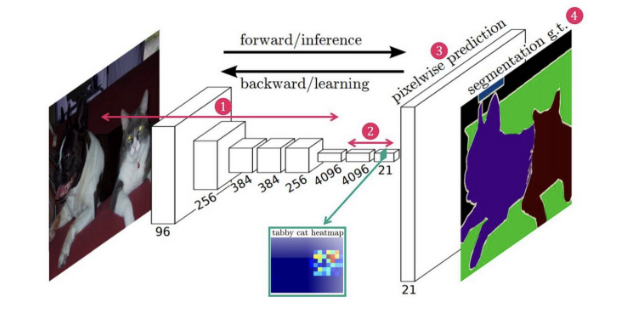

위 그림에서 보이는 것처럼 FCN은 다음과 같은 과정을 거치게 된다.

1. Convolution Layer를 거쳐 **Feature을 추출**한다.
2. 1x1 Convolution Layer를 이용해 **채널 수를 구분하려는 클래스의 개수(21)로 변경**한다.
3. **Up sampling**을 진행한다.
4. 최종 피처 맵과 라벨 피처맵의 차이를 이용하여 **네트워크 학습**한다.

### <strong> 1. Fully Convolution Layer </strong>

**Convolution 과정을 위해 논문은 기존 CNN 모델의 마지막 FC Layer 부분을 Fully Convolution Layer로 변경했다고 한다.** <br>
기존 FC layer를 사용하는 모델들에겐 다음과 같은 문제점이 존재한다.

* 이미지의 위치 정보 소실 
  * FC Layer 입력 전에 Conv layer를 거친 Feature Map을 일렬로 정렬해야함.
* 입력 이미지 크기 고정
  * 모든 Conv layer를 거치고 일렬로 정렬했을 때 차원이 항상 동일해야함.

연구진들은 위와 같은 문제점을 FC Layer를 Fully Convolution Layer로 바꿈으로써 해결했다. 

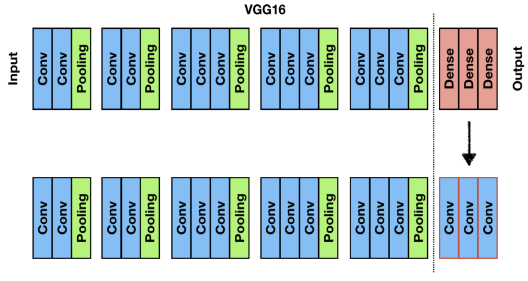


Dense Layer를 Fully Convolution Layer로 바꾸는 과정은 다음과 같다.

* 기존 VGG
  * 마지막 Feature Map의 출력: 7×7×512
  * 이후 Dense Layer의 가중치: 7×7×512×4096 (4096은 VGG 논문에서 지정한 숫자)
  * Feature Map을 일렬로 늘어뜨리고 linear 연산 진행함.
* 변형 VGG
  * 마지막 Feature Map의 출력: 7×7×512
  * 이후 Conv Layer의 가중치: 7×7×512 크기의 filter 4096개
  * Feature Map을 Conv layer에 통과시키면 1×1×4096 크기의 feature 맵을 얻음.

  

### <strong> 2. Skip architecture </strong>

이미지의 Feature를 추출한 이후 Up-sampling을 진행하게 된다. <br>
이때 마지막 **Feature Map을 한 번에 원본 이미지로 Up-sampling 하는 과정에서 문제가 생긴다.** <br>

VGG16에서 입력 이미지의 크기가 224×224인 경우 마지막 feature map의 크기는 7×7이 된다. <br>
즉, 마지막 feature map의 크기는 기존 이미지의 32배 만큼 작게 된다. <br>
우리는 이러한 **입력 이미지의 한적적인(대략적인) 위치 정보를 가지고 Up-sampling 해야한다.** <br>
논문에서 결과는 다음과 같이 정교하지 못한 것으로 드러났다.

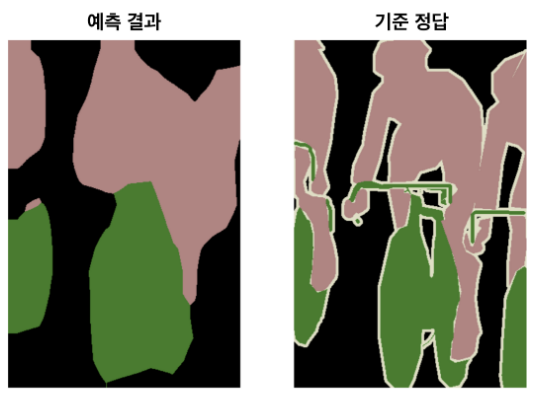

이때 연구진들은 더 정교한 segmentation map을 얻기 위해 **skip architecture** 기법을 제안했다. <br>
skip architecture는 이전에 설명한 한정적인 정보를 보완하기 위해 **이전 convolution의 feature map을 같이 활용해 정보 손실을 최소화는 기법**이다.

<strong>[FCN-32s]</strong>

* 5번의 Conv Net을 통과한 Feature Map(7×7)을 1×1 Conv Net에 통과시키고 같은 크기의 Feature Map을 얻는다.
* 해당 Feature Map을 32배 Up-sampling해서 기존 이미지 크기와 동일한 segmentation map을 얻는다.


<strong>[FCN-16s]</strong>

* 1×1 Conv Net에 통과된 7×7 Feature Map을 2배로 upsampling한 것과 4번째 Conv Block을 통과한 14×14 Feature Map을 Sum한다.
* 결과로 나온 Feature Map을 16배 Up-sampling한다.

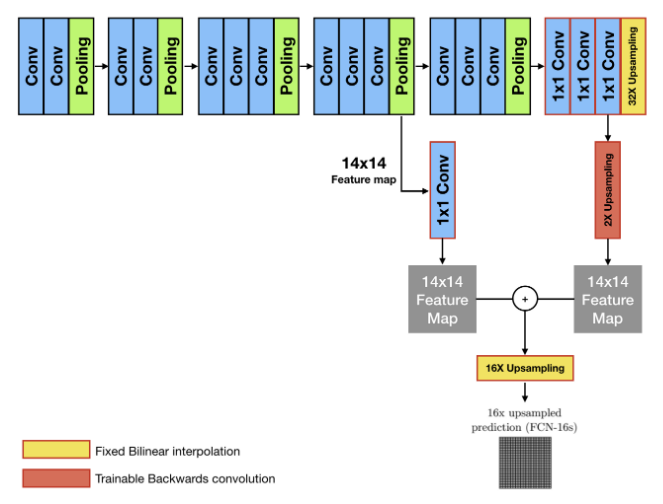

<strong>[FCN-8s]</strong>

* 이전에 FCN-16s에서 설명한 과정을 동일하게 진행한다.
* 결과 Feature Map을 2배 Up-sampling하여 3번째 Conv Block을 통과한 28×28 Feature Map과 Sum한다.
* 해당 Feature Map을 8배 Up-sampling한다.

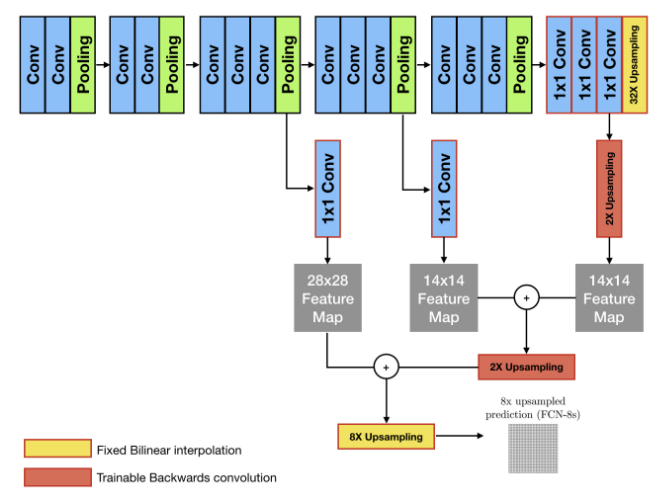


아래는 해당 모델들의 결과물로 skip architecture를 적용하면 더 정교한 결과를 얻을 수 있다는 사실을 알 수 있다.

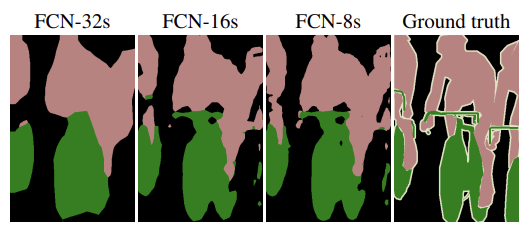

사진 출처
* https://medium.com/@msmapark2/fcn-%EB%85%BC%EB%AC%B8-%EB%A6%AC%EB%B7%B0-fully-convolutional-networks-for-semantic-segmentation-81f016d76204